In [ ]:
# With the "static" method, you should find the same results if you set e.g. T=10 in the old code, compared to T=1 and num_sensors=10 in the new code

# New Code:

In [1]:
import warnings
from location_finding_class import DAD
import matplotlib.pyplot as plt
import torch
import numpy as np

warnings.filterwarnings("ignore")

c:\Users\n10907700\Anaconda3\envs\dad_vtorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
design = DAD(
    n=10,  # num_sensors
    T=1,
    num_steps=10000,
    num_inner_samples=64,
    num_outer_samples=128,
    design_network_type="static",
)
fitted_design = design.fit()

Loss: 0.499 : 100%|██████████| 10000/10000 [08:34<00:00, 19.44it/s]



Example run 1
*True Theta: tensor([[ 2.2828,  0.5623],
        [-0.3015, -0.4345]])*
xi1: tensor([[ 0.5416,  0.0524],
        [-0.6090,  0.4837],
        [-0.3368, -0.5050],
        [ 0.1861,  0.4724],
        [-0.1601,  0.4651],
        [ 0.5813,  0.5394],
        [ 0.5650, -0.5549],
        [-0.5738, -0.3827],
        [-0.4830,  0.1742],
        [ 0.0174, -0.5035]], requires_grad=True)
 y1: tensor([ 0.4243,  0.2061,  4.3710, -0.3696, -0.0197, -0.6374,  0.7873,  2.0807,
         1.1068,  1.9285])

Example run 2
*True Theta: tensor([[-0.2456,  1.9529],
        [ 0.3205, -0.7407]])*
xi1: tensor([[ 0.5416,  0.0524],
        [-0.6090,  0.4837],
        [-0.3368, -0.5050],
        [ 0.1861,  0.4724],
        [-0.1601,  0.4651],
        [ 0.5813,  0.5394],
        [ 0.5650, -0.5549],
        [-0.5738, -0.3827],
        [-0.4830,  0.1742],
        [ 0.0174, -0.5035]], requires_grad=True)
 y1: tensor([ 0.4021, -0.5927,  1.5143,  0.6281,  0.2794, -0.0591,  2.7211,  0.2168,
        -0.1691,  1

In [4]:
def plot_design(fitted_design, run_id=1, df=None):
    # get the designs
    df = fitted_design.ho_model.run_df.copy() if df is None else df
    df = df[df["run_id"] == run_id]

    # generate 2 2d grids for the x & y bounds
    x0s, x1s = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    # get true thetas
    tt = torch.tensor(fitted_design.ho_model.true_thetas[run_id - 1])

    # generate contours
    z = [
        fitted_design.ho_model.forward_map(torch.tensor([x0, x1]).unsqueeze(-2), tt)
        for (x0, x1) in zip(x0s.flatten(), x1s.flatten())
    ]

    # plot
    fig, ax = plt.subplots()
    c = ax.pcolormesh(x0s, x1s, np.array(z).reshape(100, 100), cmap="RdBu")
    ax.set_title(
        "Design - {} (n={})".format(fitted_design.design_network_type, fitted_design.n)
    )
    fig.colorbar(c, ax=ax)
    ax.scatter(df.xi_0, df.xi_1, s=2, c="black")
    for i, txt in enumerate(df.order):
        ax.annotate(txt, (df.xi_0[i], df.xi_1[i]))
    plt.show()

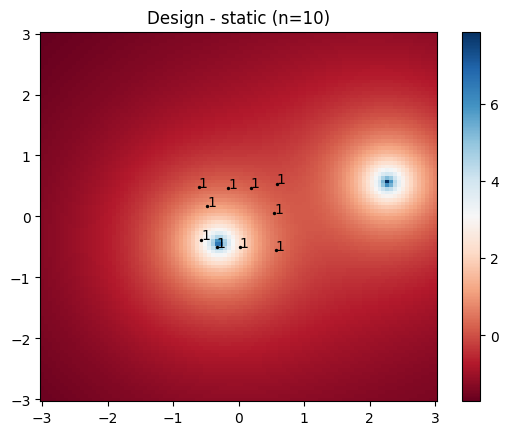

In [5]:
plot_design(fitted_design)

# Old Code:

copied from: https://github.com/ae-foster/dad/blob/main/location_finding.py

In [3]:
!python location_finding.py --num-steps 10000 --num-inner-samples 64 --num-outer-samples 128 --design-network-type static --num-experiments 10


Example run 1
*True Theta: tensor([[-0.1228,  0.8208],
        [-1.3081,  0.6779]])*
xi1: tensor([0.5696, 0.0404], requires_grad=True)
 y1: 0.8355629444122314
xi2: tensor([-0.2931,  0.5897], requires_grad=True)
 y2: 2.249709367752075
xi3: tensor([-0.5183, -0.5681], requires_grad=True)
 y3: 0.2053459882736206
xi4: tensor([0.0989, 0.4882], requires_grad=True)
 y4: 1.6867191791534424
xi5: tensor([ 0.2811, -0.4125], requires_grad=True)
 y5: 0.08608085662126541
xi6: tensor([ 0.5207, -0.5528], requires_grad=True)
 y6: 0.7695834636688232
xi7: tensor([-0.5893,  0.3612], requires_grad=True)
 y7: 1.2912057638168335
xi8: tensor([0.5331, 0.5335], requires_grad=True)
 y8: 0.46314847469329834
xi9: tensor([-0.1041, -0.4840], requires_grad=True)
 y9: 0.0810835212469101
xi10: tensor([-0.5263, -0.1477], requires_grad=True)
 y10: 0.15569037199020386

Example run 2
*True Theta: tensor([[ 0.2143, -0.8467],
        [-0.3639,  1.1265]])*
xi1: tensor([0.5696, 0.0404], requires_grad=True)
 y1: 0.7459218502044

c:\Users\n10907700\Anaconda3\envs\dad_vtorch\lib\site-packages\pyro\distributions\torch_patch.py:81: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:2524.)
  return torch.stack([v.symeig(eigenvectors=False)[0][:1] > 0.0

Loss: 0.716 : 100%|██████████| 10000/10000 [10:34<00:00, 15.77it/s]
